In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train_HR"
test_path = "data/DIV2K/valid_HR"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1843, 0.2471, 0.2745,  ..., 0.4039, 0.4157, 0.4157],
         [0.1922, 0.2431, 0.2549,  ..., 0.3961, 0.4078, 0.4157],
         [0.1765, 0.1804, 0.1765,  ..., 0.3961, 0.4000, 0.4000],
         ...,
         [0.1373, 0.1608, 0.1725,  ..., 0.3333, 0.3373, 0.3333],
         [0.1412, 0.1647, 0.1765,  ..., 0.3529, 0.3529, 0.3412],
         [0.1490, 0.1882, 0.1843,  ..., 0.3569, 0.3451, 0.3176]],

        [[0.1098, 0.1608, 0.1804,  ..., 0.3294, 0.3490, 0.3529],
         [0.1216, 0.1686, 0.1765,  ..., 0.3333, 0.3412, 0.3490],
         [0.1176, 0.1176, 0.1137,  ..., 0.3333, 0.3333, 0.3294],
         ...,
         [0.0902, 0.1059, 0.1098,  ..., 0.2863, 0.2941, 0.2784],
         [0.0863, 0.1059, 0.1098,  ..., 0.3059, 0.3059, 0.2941],
         [0.0941, 0.1255, 0.1176,  ..., 0.3059, 0.2941, 0.2706]],

        [[0.1098, 0.1569, 0.1647,  ..., 0.2745, 0.2824, 0.2784],
         [0.0980, 0.1294, 0.1255,  ..., 0.2745, 0.2824, 0.2863],
         [0.0902, 0.0941, 0.0863,  ..., 0.27

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

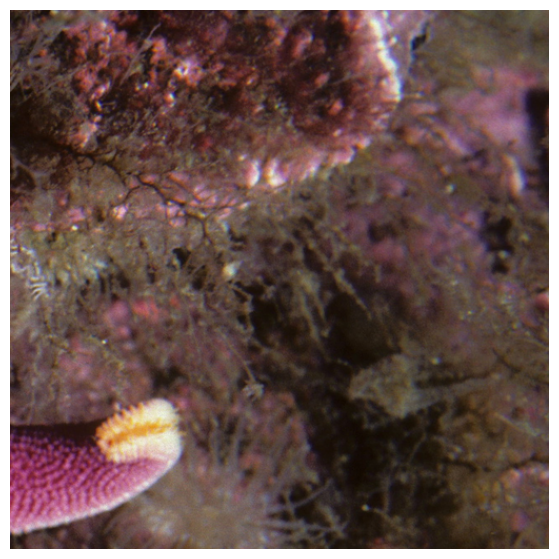

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "my_upscale_v4.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

model = UpscaleModel2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

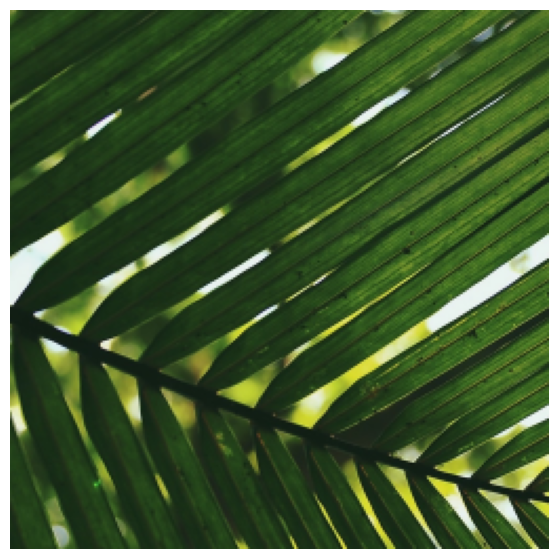

In [8]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.4755, 0.5127, 0.4284,  ..., 0.3363, 0.3549, 0.3461],
         [0.4363, 0.3873, 0.3010,  ..., 0.3559, 0.3284, 0.3804],
         [0.3324, 0.2843, 0.2235,  ..., 0.3529, 0.3500, 0.3431],
         ...,
         [0.0892, 0.0853, 0.0912,  ..., 0.0931, 0.1078, 0.0980],
         [0.0912, 0.0873, 0.0912,  ..., 0.1000, 0.0951, 0.1029],
         [0.0922, 0.0853, 0.0902,  ..., 0.1167, 0.1039, 0.1069]],

        [[0.5412, 0.5706, 0.5088,  ..., 0.4676, 0.4824, 0.4745],
         [0.5196, 0.4863, 0.4225,  ..., 0.4853, 0.4529, 0.4951],
         [0.4559, 0.4255, 0.3598,  ..., 0.4833, 0.4824, 0.4745],
         ...,
         [0.1696, 0.1725, 0.1784,  ..., 0.1833, 0.1961, 0.1843],
         [0.1696, 0.1735, 0.1765,  ..., 0.2010, 0.1941, 0.1990],
         [0.1706, 0.1716, 0.1765,  ..., 0.2078, 0.2078, 0.2049]],

        [[0.2373, 0.2657, 0.2127,  ..., 0.1608, 0.1735, 0.1441],
         [0.2118, 0.1824, 0.1647,  ..., 0.1471, 0.1275, 0.1716],
         [0.1706, 0.1549, 0.1314,  ..., 0.1598, 0.1618, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

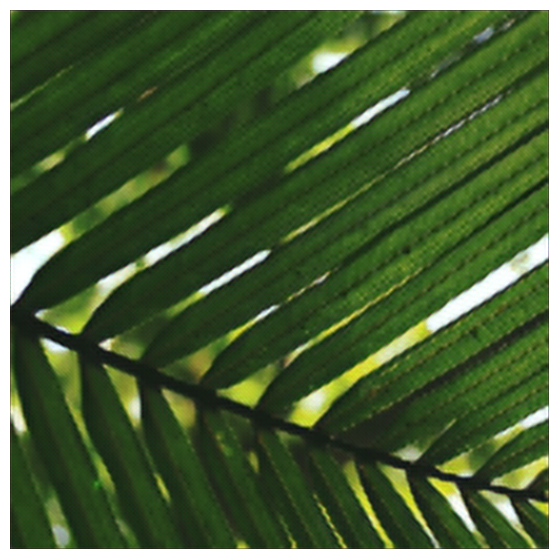

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.3295, 0.4364, 0.4233,  ..., 0.3382, 0.3554, 0.3068],
         [0.4392, 0.5808, 0.5296,  ..., 0.3958, 0.4399, 0.3471],
         [0.4068, 0.5070, 0.4288,  ..., 0.3396, 0.3976, 0.3208],
         ...,
         [0.1606, 0.1438, 0.1230,  ..., 0.1163, 0.1631, 0.1464],
         [0.1981, 0.2100, 0.1607,  ..., 0.1748, 0.2304, 0.2077],
         [0.1604, 0.2001, 0.1598,  ..., 0.1938, 0.2383, 0.1718]],

        [[0.3424, 0.4827, 0.4210,  ..., 0.3741, 0.3546, 0.2487],
         [0.4421, 0.6468, 0.5889,  ..., 0.5184, 0.5218, 0.3361],
         [0.4096, 0.6030, 0.5456,  ..., 0.4815, 0.5165, 0.3509],
         ...,
         [0.1540, 0.2198, 0.1617,  ..., 0.2198, 0.2455, 0.2023],
         [0.1765, 0.2520, 0.2092,  ..., 0.2601, 0.2967, 0.2350],
         [0.1517, 0.2126, 0.1704,  ..., 0.2059, 0.2345, 0.1839]],

        [[0.2034, 0.3518, 0.2926,  ..., 0.2723, 0.2891, 0.2048],
         [0.2776, 0.3869, 0.2860,  ..., 0.2547, 0.3048, 0.2474],
         [0.2360, 0.3010, 0.2132,  ..., 0.1799, 0.2482, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[-0.0857,  0.1212, -0.0049],
          [ 0.0816,  0.1317, -0.1083],
          [ 0.0942, -0.1833, -0.0497]],

         [[-0.0223, -0.1040,  0.1926],
          [-0.0639,  0.2021,  0.0086],
          [ 0.0928, -0.2079, -0.0902]],

         [[-0.0555, -0.0455, -0.0691],
          [-0.2225,  0.1588, -0.0641],
          [ 0.1027,  0.1486,  0.0748]]],


        [[[ 0.0894, -0.2091,  0.0513],
          [ 0.0458,  0.0004, -0.1429],
          [ 0.1897, -0.1394,  0.0062]],

         [[-0.0261,  0.1719,  0.1300],
          [-0.2143,  0.1972,  0.1174],
          [-0.0542, -0.1456, -0.0707]],

         [[ 0.0671, -0.1464,  0.1097],
          [-0.1023,  0.0309,  0.1994],
          [-0.0369, -0.0606, -0.0750]]],


        [[[ 0.1177,  0.0179,  0.1264],
          [-0.1325, -0.1973,  0.0805],
          [-0.1645,  0.1476,  0.0229]],

         [[-0.1277, -0.2115,  0.0346],
          [ 0.1900, -0.0287, -0.1778],
          [-0.0406,  0.1778,  0.0955]],

         [[ 0.1870,  0

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(18334.6895)

In [19]:
type(model)

my_upscale_model2.UpscaleModel2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

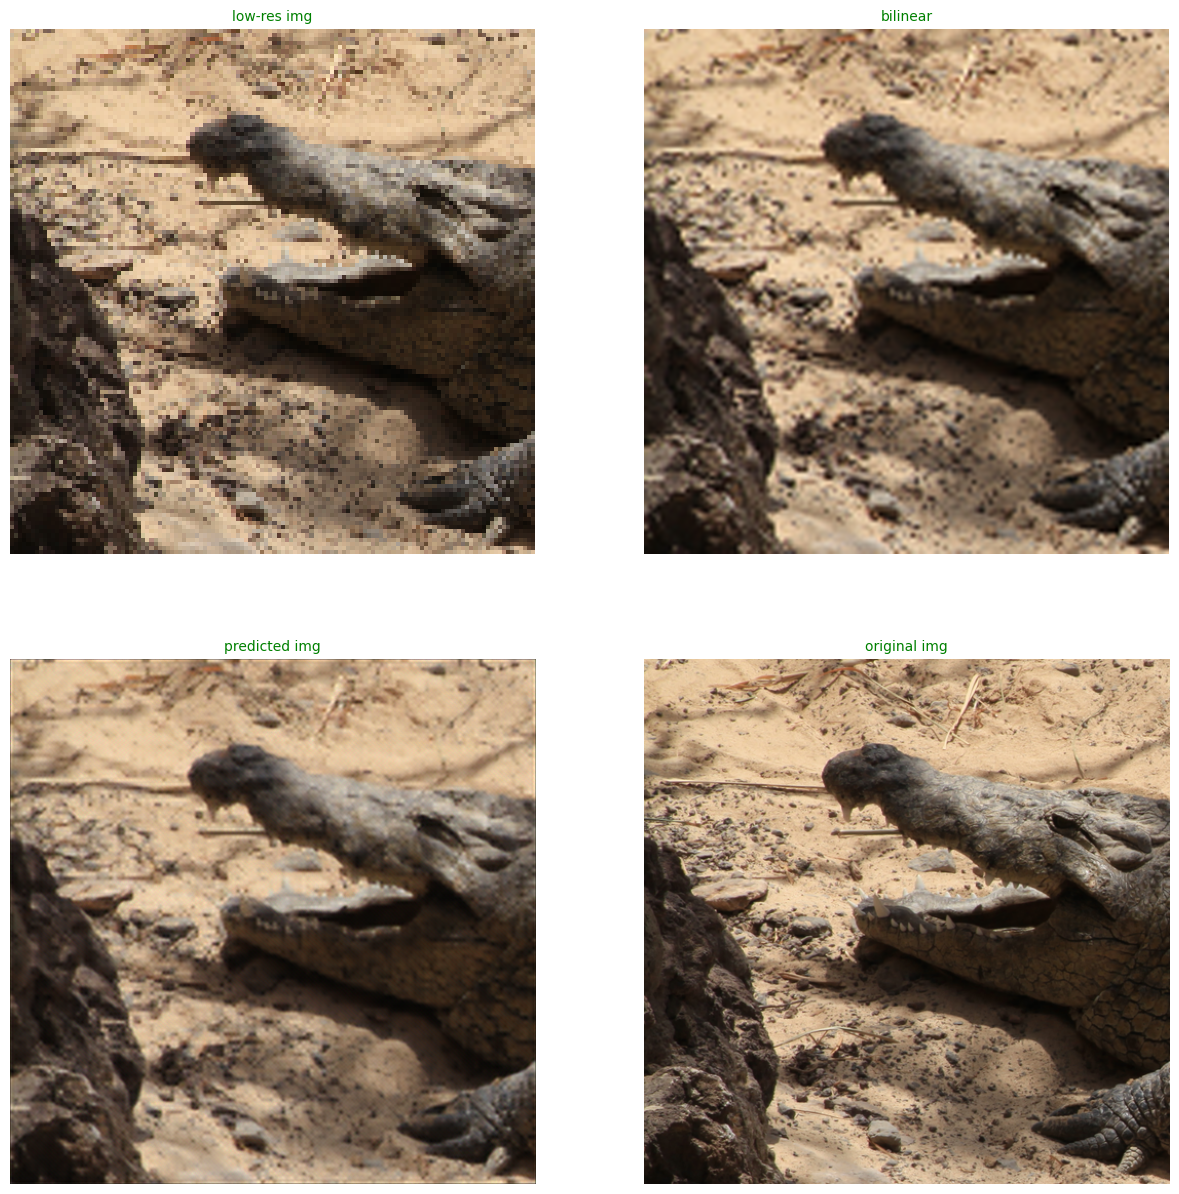

In [20]:
i = 0
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bicubic")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

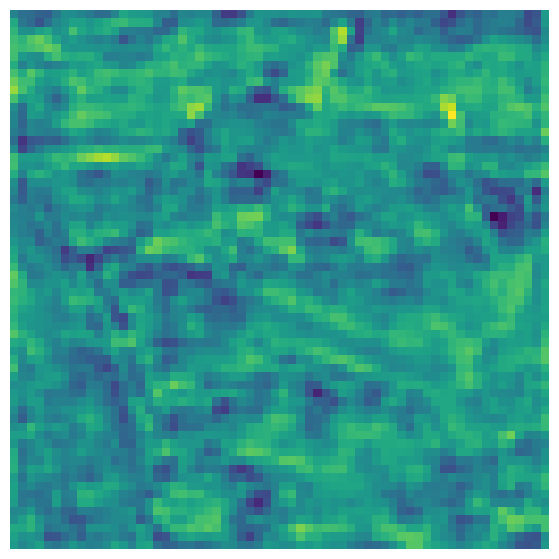

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")